## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Load data set

In [2]:
data = pd.read_csv("../data/data.csv", encoding = 'unicode_escape')

In [3]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## Explore data

In [4]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## Renaming the columns

In [5]:
data.rename(columns = {'InvoiceNo':'Invoice_Num',
                       'StockCode':'Item_Code',
                       'Description':'Item_Description',
                       'Quantity':'Amount_Purchased',
                       'InvoiceDate':'Invoice_Date',
                       'UnitPrice':'Price_Per_Unit',
                       'CustomerID':'Customer_ID',
                       'Country':'Country'},
            inplace = True)

In [6]:
data.columns

Index(['Invoice_Num', 'Item_Code', 'Item_Description', 'Amount_Purchased',
       'Invoice_Date', 'Price_Per_Unit', 'Customer_ID', 'Country'],
      dtype='object')

## Top 10 and Last 10 rows of data set

In [7]:
data.head(10)

,Invoice_Num,Item_Code,Item_Description,Amount_Purchased,Invoice_Date,Price_Per_Unit,Customer_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [8]:
data.tail(10)

,Invoice_Num,Item_Code,Item_Description,Amount_Purchased,Invoice_Date,Price_Per_Unit,Customer_ID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


## Change date format to datetime format

In [9]:
data['Invoice_Date'] = pd.to_datetime(data.Invoice_Date, format = '%m/%d/%Y %H:%M')

In [10]:
data.head()

,Invoice_Num,Item_Code,Item_Description,Amount_Purchased,Invoice_Date,Price_Per_Unit,Customer_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Shape of dataframe

In [11]:
data.shape

(541909, 8)

## Item_Description and Customer_ID are missing values

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice_Num       541909 non-null  object        
 1   Item_Code         541909 non-null  object        
 2   Item_Description  540455 non-null  object        
 3   Amount_Purchased  541909 non-null  int64         
 4   Invoice_Date      541909 non-null  datetime64[ns]
 5   Price_Per_Unit    541909 non-null  float64       
 6   Customer_ID       406829 non-null  float64       
 7   Country           541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
data[pd.isna(data['Customer_ID']) == True].count()

Invoice_Num         135080
Item_Code           135080
Item_Description    133626
Amount_Purchased    135080
Invoice_Date        135080
Price_Per_Unit      135080
Customer_ID              0
Country             135080
dtype: int64

In [14]:
data[pd.isna(data['Customer_ID']) == False].count()

Invoice_Num         406829
Item_Code           406829
Item_Description    406829
Amount_Purchased    406829
Invoice_Date        406829
Price_Per_Unit      406829
Customer_ID         406829
Country             406829
dtype: int64

In [15]:
percent_missing = data.isnull().sum() / data.shape[0] * 100
percent_missing

Invoice_Num          0.000000
Item_Code            0.000000
Item_Description     0.268311
Amount_Purchased     0.000000
Invoice_Date         0.000000
Price_Per_Unit       0.000000
Customer_ID         24.926694
Country              0.000000
dtype: float64

## Top 10 Customer IDs by Number of Orders

In [16]:
data['Customer_ID'].value_counts().head(10)

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: Customer_ID, dtype: int64

## Top 10 Countries by Number of Orders

In [17]:
# This data makes sense since the data set is from a U.K. company
data['Country'].value_counts().head(10)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64

## Top 10 Invoices by Count

In [18]:
data['Invoice_Num'].value_counts().head(10)

573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
Name: Invoice_Num, dtype: int64

## Number of Unique Invoices

In [19]:
data['Invoice_Num'].nunique()

25900

## Top 10 Item (Codes) by Count

In [20]:
data['Item_Code'].value_counts().head(10)

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: Item_Code, dtype: int64

## Number of Unique Items

In [21]:
data['Item_Code'].nunique()

4070

## Top 10 Item Price by Count

In [22]:
data['Price_Per_Unit'].value_counts().head(10)

1.25    50496
1.65    38181
0.85    28497
2.95    27768
0.42    24533
4.95    19040
3.75    18600
2.10    17697
2.46    17091
2.08    17005
Name: Price_Per_Unit, dtype: int64

## Number of Unique Item Prices

In [23]:
data['Price_Per_Unit'].nunique()

1630

## Top 10 Invoice Dates by Count

In [24]:
data['Invoice_Date'].value_counts().head(10)

2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
2011-11-30 15:13:00     687
2011-12-08 09:20:00     676
2010-12-06 16:57:00     675
2011-12-05 17:28:00     662
2010-12-09 14:09:00     652
Name: Invoice_Date, dtype: int64

## Number of Unique Invoice Dates

In [25]:
data['Invoice_Date'].nunique()

23260

## Basic statistics

In [26]:
data.describe()

,Amount_Purchased,Price_Per_Unit,Customer_ID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Product Descriptions

In [27]:
data.Item_Description.nunique()

4223

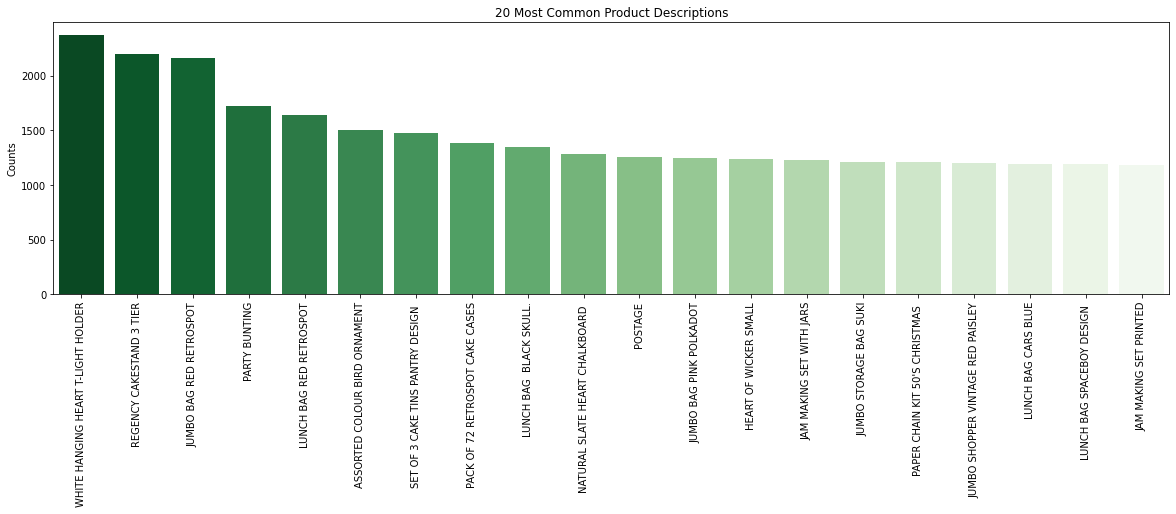

In [28]:
description_counts = data.Item_Description.value_counts().sort_values(ascending = False).iloc[0:20]
plt.figure(figsize = (20, 5))
sns.barplot(description_counts.index, description_counts.values, palette = "Greens_r")
plt.ylabel("Counts")
plt.title("20 Most Common Product Descriptions");
plt.xticks(rotation = 90);

## Don't use these 2 visuals - not helpful and take a long time to run

In [29]:
# sns.boxplot(x = 'Price_Per_Unit', y = 'Amount_Purchased', data = data)

In [30]:
# sns.jointplot(x = 'Price_Per_Unit', y = 'Amount_Purchased', data = data, kind = 'kde')

## Histograms of the numerical data columns

array([[<AxesSubplot:title={'center':'Amount_Purchased'}>,
        <AxesSubplot:title={'center':'Invoice_Date'}>],
       [<AxesSubplot:title={'center':'Price_Per_Unit'}>,
        <AxesSubplot:title={'center':'Customer_ID'}>]], dtype=object)

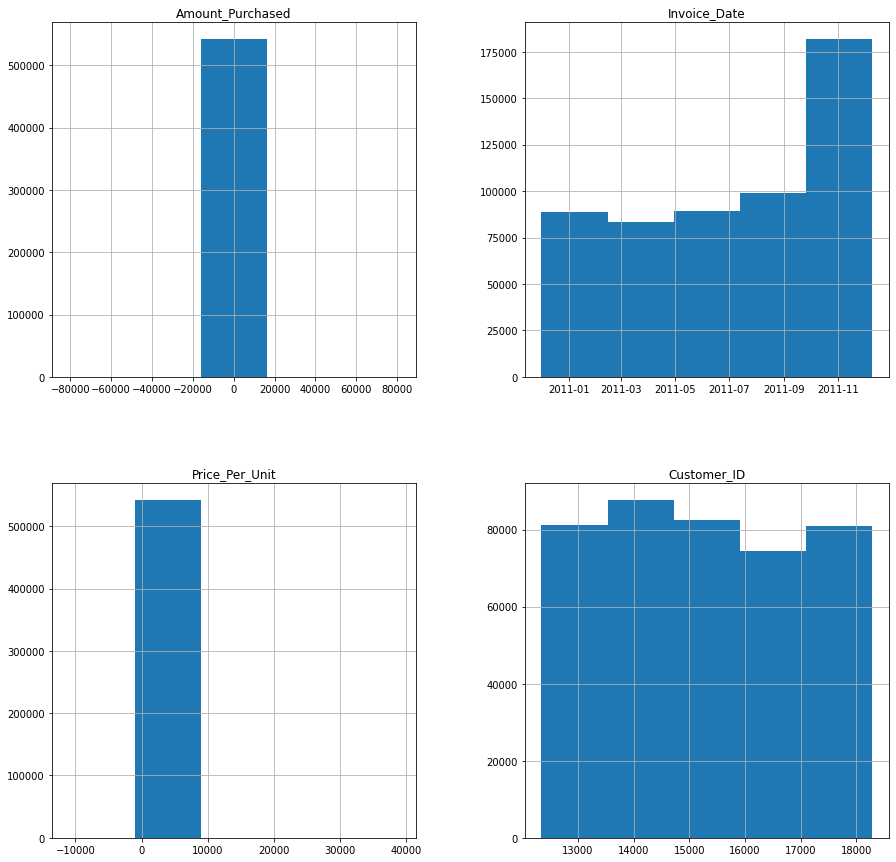

In [31]:
# This visual works better with more numerical columns
data.hist(bins = 5, figsize = (15, 15))

## Feature Correlations

AxesSubplot(0.125,0.125;0.62x0.755)


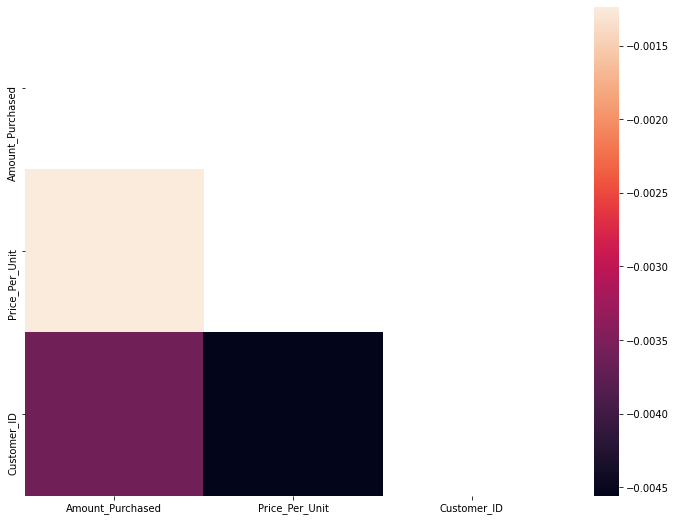

In [32]:
# Another visualization that works better with more numerical columns of data
correlations = data.corr()
f, ax = plt.subplots(figsize = (12, 9))
mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap_one = sns.heatmap(correlations, mask = mask)
print(heatmap_one)

In [33]:
# Works better with more numerical columns of data
corr = data.corr()

important_feature = corr['Price_Per_Unit'].sort_values(ascending = False).to_frame()
important_feature

,Price_Per_Unit
Price_Per_Unit,1.000000
Amount_Purchased,-0.001235
Customer_ID,-0.004560


## Dropping all rows with missing values

In [34]:
data = data.dropna(axis = 0)

In [35]:
data.describe()

,Amount_Purchased,Price_Per_Unit,Customer_ID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice_Num       406829 non-null  object        
 1   Item_Code         406829 non-null  object        
 2   Item_Description  406829 non-null  object        
 3   Amount_Purchased  406829 non-null  int64         
 4   Invoice_Date      406829 non-null  datetime64[ns]
 5   Price_Per_Unit    406829 non-null  float64       
 6   Customer_ID       406829 non-null  float64       
 7   Country           406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


## Remove all duplicates

In [37]:
data.drop_duplicates(keep = 'first', inplace = True)

In [38]:
data.describe()

,Amount_Purchased,Price_Per_Unit,Customer_ID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice_Num       401604 non-null  object        
 1   Item_Code         401604 non-null  object        
 2   Item_Description  401604 non-null  object        
 3   Amount_Purchased  401604 non-null  int64         
 4   Invoice_Date      401604 non-null  datetime64[ns]
 5   Price_Per_Unit    401604 non-null  float64       
 6   Customer_ID       401604 non-null  float64       
 7   Country           401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


## Fulfilled and Cancelled orders

In [40]:
data["Cancelled"] = np.where(data.Invoice_Num.apply(lambda l: l[0] == "C"), True, False)
data.Cancelled.value_counts() / data.shape[0] * 100

False    97.790859
True      2.209141
Name: Cancelled, dtype: float64

## Count of rows where Price per unit is 0

In [41]:
data[data['Price_Per_Unit'] == True].count()

Invoice_Num         100
Item_Code           100
Item_Description    100
Amount_Purchased    100
Invoice_Date        100
Price_Per_Unit      100
Customer_ID         100
Country             100
Cancelled           100
dtype: int64

In [42]:
data[data['Price_Per_Unit'] == True].head()

,Invoice_Num,Item_Code,Item_Description,Amount_Purchased,Invoice_Date,Price_Per_Unit,Customer_ID,Country,Cancelled
10113,537225,M,Manual,1,2010-12-05 16:41:00,1.0,12748.0,United Kingdom,False
115319,546117,M,Manual,12,2011-03-09 13:56:00,1.0,16771.0,United Kingdom,False
130294,547444,POST,POSTAGE,1,2011-03-23 10:55:00,1.0,12811.0,Portugal,False
142718,548631,M,Manual,1,2011-04-01 12:24:00,1.0,13184.0,United Kingdom,False
142866,548648,22558,CLOTHES PEGS RETROSPOT PACK 24,12,2011-04-01 13:20:00,1.0,12949.0,United Kingdom,False


## Two ways to check for null or 'NaN' values

In [43]:
# 'chaining' or 'linking'
data.isnull().sum().sum()

0

In [44]:
# indexing or bracket notation
data[data.isna()].count()

Invoice_Num         0
Item_Code           0
Item_Description    0
Amount_Purchased    0
Invoice_Date        0
Price_Per_Unit      0
Customer_ID         0
Country             0
Cancelled           0
dtype: int64

## Time difference between oldest and most recent orders

In [45]:
oldest_order = data['Invoice_Date'].min()
newest_order = data['Invoice_Date'].max()

time_difference = newest_order - oldest_order
time_difference

Timedelta('373 days 04:24:00')

In [46]:
print('The TOP 5 customers with most number of orders...')
data.sort_values(by = 'Invoice_Num', ascending = False).head()

The TOP 5 customers with most number of orders...


,Invoice_Num,Item_Code,Item_Description,Amount_Purchased,Invoice_Date,Price_Per_Unit,Customer_ID,Country,Cancelled
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,True
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,True


## Money spent by Customers

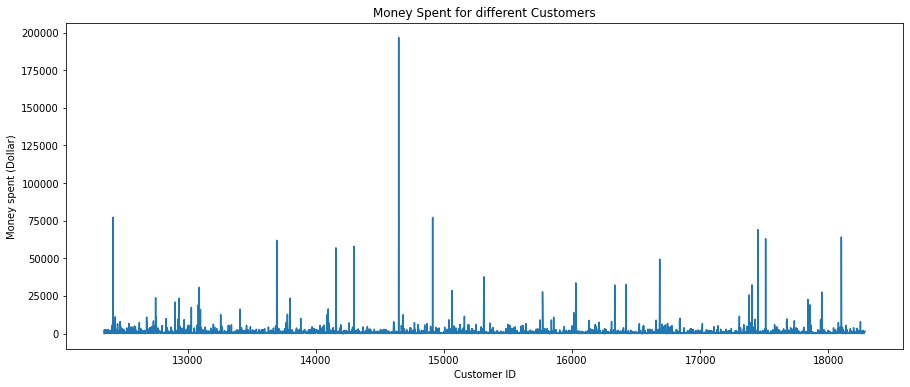

In [47]:
spent = data.groupby(by = ['Customer_ID','Country'], as_index = False)['Amount_Purchased'].sum()

plt.subplots(figsize = (15,6))
plt.plot(spent.Customer_ID, spent.Amount_Purchased)
plt.xlabel('Customer ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

## Free items from a retailer/e-commerce store

In [48]:
df_free = data[data.Price_Per_Unit == 0]
print(len(df_free))
df_free.head()

40


,Invoice_Num,Item_Code,Item_Description,Amount_Purchased,Invoice_Date,Price_Per_Unit,Customer_ID,Country,Cancelled
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,False
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,False
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,False
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,False
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,False


## Unique customers per month

In [49]:
unique_monthly_cust = data.set_index('Invoice_Date')['Customer_ID'].resample('M').nunique()
unique_monthly_cust

Invoice_Date
2010-12-31     948
2011-01-31     783
2011-02-28     798
2011-03-31    1020
2011-04-30     899
2011-05-31    1079
2011-06-30    1051
2011-07-31     993
2011-08-31     980
2011-09-30    1302
2011-10-31    1425
2011-11-30    1711
2011-12-31     686
Freq: M, Name: Customer_ID, dtype: int64

## Total Amount spent per customer

In [50]:
data['Total_Cost'] = data['Price_Per_Unit'] * data['Amount_Purchased']
data.head()

,Invoice_Num,Item_Code,Item_Description,Amount_Purchased,Invoice_Date,Price_Per_Unit,Customer_ID,Country,Cancelled,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34


In [51]:
money_spent = data.groupby('Customer_ID',as_index = False)['Total_Cost'].sum()
money_spent.columns = ['Customer_ID','Money']

In [52]:
money_spent.head()

,Customer_ID,Money
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## Total Spent by Customer per invoice

In [53]:
data_y = data.groupby(['Customer_ID','Invoice_Num']).agg({'Total_Cost': lambda x: x.sum()})
data_y.head(20)

Total_Cost
Customer_ID Invoice_Num            
12346.0     541431         77183.60
            C541433       -77183.60
12347.0     537626           711.79
            542237           475.39
            549222           636.25
            556201           382.52
            562032           584.91
            573511          1294.32
            581180           224.82
12348.0     539318           892.80
            541998           227.44
            548955           367.00
            568172           310.00
12349.0     577609          1757.55
12350.0     543037           334.40
12352.0     544156           296.50
            545323           144.35
            545332           840.30
            546869           120.33
            547390           160.33

## Total Spending by Country

In [54]:
data_country = data.groupby("Country").agg({'Total_Cost': lambda x: x.sum()})
data_country.head(10)

,Total_Cost
Country,
Australia,137009.77
Austria,10154.32
Bahrain,548.40
Belgium,40910.96
Brazil,1143.60
Canada,3666.38
Channel Islands,20076.39
Cyprus,12858.76
Czech Republic,707.72


## Removed negative quantity values and price per unit values

In [55]:
data = data[data.Amount_Purchased > 0]

In [56]:
data = data[data.Price_Per_Unit > 0]

In [57]:
data.head()

,Invoice_Num,Item_Code,Item_Description,Amount_Purchased,Invoice_Date,Price_Per_Unit,Customer_ID,Country,Cancelled,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice_Num       392692 non-null  object        
 1   Item_Code         392692 non-null  object        
 2   Item_Description  392692 non-null  object        
 3   Amount_Purchased  392692 non-null  int64         
 4   Invoice_Date      392692 non-null  datetime64[ns]
 5   Price_Per_Unit    392692 non-null  float64       
 6   Customer_ID       392692 non-null  float64       
 7   Country           392692 non-null  object        
 8   Cancelled         392692 non-null  bool          
 9   Total_Cost        392692 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.3+ MB


In [59]:
data.describe()

,Amount_Purchased,Price_Per_Unit,Customer_ID,Total_Cost
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,22.631500
std,180.492832,22.241836,1713.539549,311.099224
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.450000
75%,12.000000,3.750000,16791.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000
